### Open and Reproducible researh Computing (Fall 2021)
### Assignment 1
By:
Name: Motasem Abualqumboz
E-mail: motasem.abualqumboz@usu.edu / mabualqumboz@gmail.com

content:
- Block (1)
- Block (2)

In [76]:
# Block (1): Install the nwis library
!pip install nwis                        # Here we install the library nwis

In [77]:
# Block (2): Install the required libraries
import numpy as np                               # import the numpy library as np
import pandas as pd                              # import the pandas library as pd
import matplotlib.pyplot as plt                  # import the matplotlib.pyplot as plt
from nwis import Nwis                            # import the Nwis library from nwis library (refer to Block 1)

output_pkl_file = 'streamflow_data_'

In [117]:
# Block (3): List of USGS stream gages
Site_id_1 = '13185000'                   # Site Id for Boise River at Twin Springs
Site_id_2 = '13139510'                   # Site Id for Big Wood River at Hailey
Site_id_3 = '13246000'                   # Site Id for North Fork of the Payette near Banks
Site_id_4 = '13042500'                   # Site Id for Henry's Fork Near Usland Park
Site_id_5 = '06752260'                   # Site Id for Cache La Poudre River near Fort Collins (CO)
Site_id_6 = '09085000'                   # Site Id for Roaring fork River at Glenwood Springs (CO)

Site_id = Site_id_6
Name = "Roaring"


In [79]:
# Block (4): The start and end time
StartDate = '1970-10-01'
EndDate = '2020-09-30'

In [80]:
# Block (5): List of USGS stream gages
nwis_data = Nwis()
ds = nwis_data.get_data(site=Site_id, start_date=StartDate , end_date=EndDate, data_type='dv')          # dv = daily values 
ds

<xarray.Dataset>
Dimensions:   (datetime: 18263)
Coordinates:
  * datetime  (datetime) datetime64[ns] 1970-10-01 1970-10-02 ... 2020-09-30
Data variables:
    00010     (datetime) float64 nan nan nan nan nan ... 13.1 11.2 10.7 11.3
    00060     (datetime) float64 905.0 914.0 887.0 842.0 ... 511.0 514.0 527.0
Attributes:
    site_name:         ROARING FORK RIVER AT GLENWOOD SPRINGS, CO.
    site_code:         09085000
    site_latitude:     39.54359307
    site_longitude:    -107.3294984
    site_altitude:     5720.73
    site_coord_datum:  NAD83

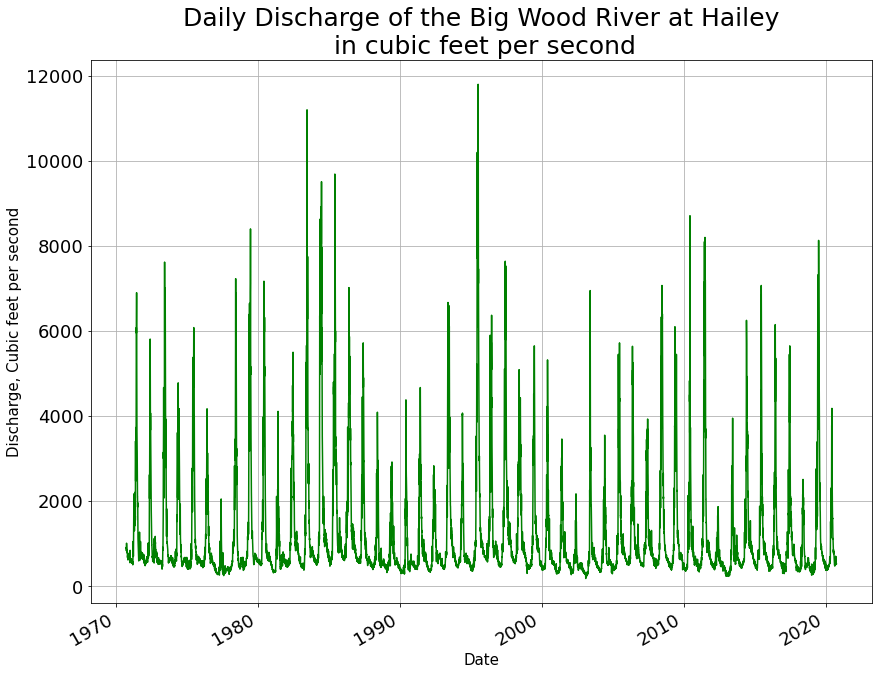

In [155]:
# BLock (6)
ds['00060'].plot(x='datetime', figsize = (14,10), color = "green")
plt.rcParams['figure.figsize'] = (14,10)                             # Update the figure size for all coming figures
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Discharge, Cubic feet per second', fontsize =15)
plt.title('Daily Discharge of the Big Wood River at Hailey\n in cubic feet per second', fontsize = 25)
plt.grid()


In [156]:
# Get the dates and convert them to a Pandas datetime object
dates = ds['datetime'].values
dates = pd.DatetimeIndex(dates) 

# Get the streamflow in ft^3/s as a numerical array and create one that is the same values but in m^3/s
Q_cfs = ds['00060'].values
Q_cms = Q_cfs / (3.2808**3)

# Create a water year vector by getting the year for every streamflow observation, checking the 
# associated month of that observation and then – if that month is October (10) or onward – add
# 1 to the water year
WY = ds['datetime.year'].values
WY[dates.month>=10] += 1

# Create a pandas DataFrame from these variables
df = pd.DataFrame()
df['Dates'] = dates
df['WaterYear'] = WY
df['Discharge_cfs'] = Q_cfs
df['Discharge_cms'] = Q_cms

# Rebuild the index to be able to use the pd.DataFrame.groupby() method
df.index = pd.to_datetime(df['Dates'],'%y-%m-%d')

# Save to a pickle file
# Question: What's going on with the file name? 
df.to_pickle(output_pkl_file+Site_id+'.pkl')
df


,Dates,WaterYear,Discharge_cfs,Discharge_cms
Dates,,,,
1970-10-01,1970-10-01,1971,905.0,25.627681
1970-10-02,1970-10-02,1971,914.0,25.882542
1970-10-03,1970-10-03,1971,887.0,25.117959
1970-10-04,1970-10-04,1971,842.0,23.843655
1970-10-05,1970-10-05,1971,833.0,23.588794
...,...,...,...,...
2020-09-26,2020-09-26,2020,518.0,14.668662
2020-09-27,2020-09-27,2020,514.0,14.555390
2020-09-28,2020-09-28,2020,511.0,14.470436


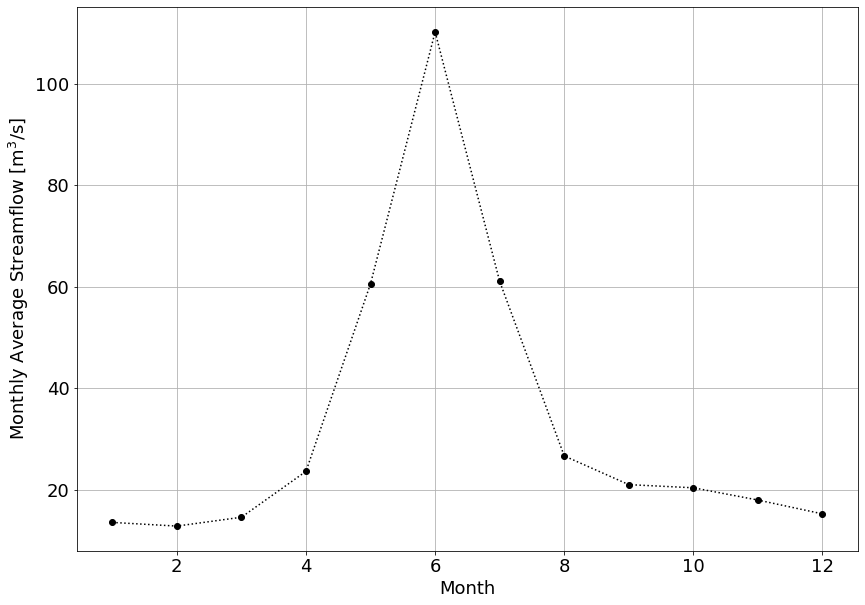

In [157]:
q_seasonal = df['Discharge_cms'].groupby(by=df.index.month).mean().values

plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18}) # Increase the font size
plt.plot((np.arange(q_seasonal.size)+1),q_seasonal,'ko:')
plt.xlabel('Month')
plt.ylabel('Monthly Average Streamflow [m${}^3$/s]')
plt.grid()
plt.show()

In [158]:
Q_ams = df.groupby(by=df['WaterYear']).max()
Q_ams

,Dates,Discharge_cfs,Discharge_cms
WaterYear,,,
1971,1971-09-30,6900.0,195.393369
1972,1972-09-30,5810.0,164.526881
1973,1973-09-30,7620.0,215.782243
1974,1974-09-30,4780.0,135.359465
1975,1975-09-30,6080.0,172.172708
1976,1976-09-30,4170.0,118.085558
1977,1977-09-30,2050.0,58.051653
1978,1978-09-30,7230.0,204.738270
1979,1979-09-30,8400.0,237.870189


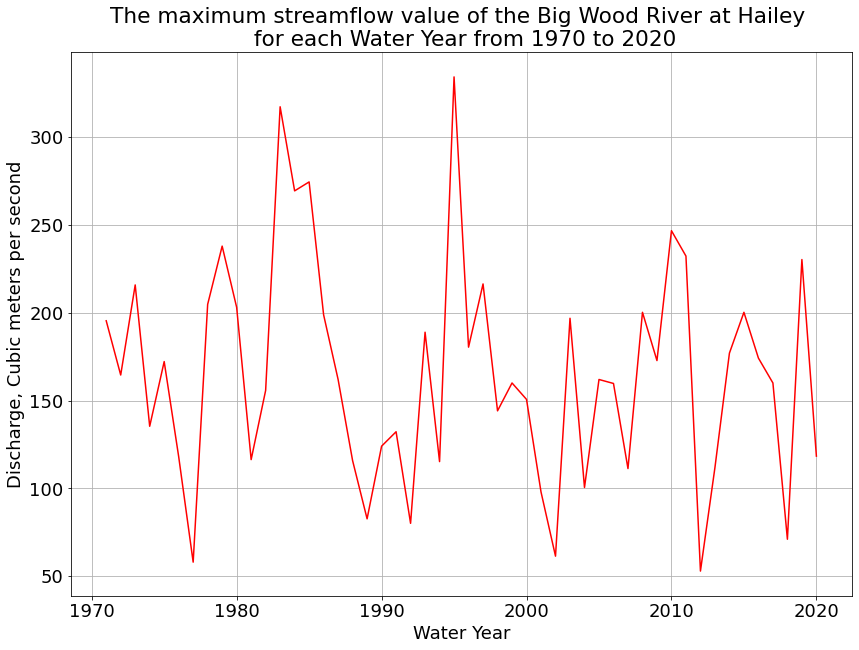

In [159]:
Q_ams['Discharge_cms'].plot(x='WaterYear', color = "red")
plt.xlabel('Water Year')
plt.ylabel('Discharge, Cubic meters per second')
plt.title("The maximum streamflow value of the Big Wood River at Hailey \n for each Water Year from 1970 to 2020")
plt.grid()

In [160]:
df_1971 = df[df['WaterYear'] ==1971]
df_1971
df_1971.max()


Dates            1971-09-30 00:00:00
WaterYear                       1971
Discharge_cfs                 6900.0
Discharge_cms             195.393369
dtype: object

In [161]:
Q_ams_sort=Q_ams.Discharge_cms.sort_values(ascending=False)
Q_ams_sort

WaterYear
1995    334.150979
1983    317.160252
1985    274.400253
1984    269.303035
2010    246.648731
1979    237.870189
2011    232.206613
2019    230.224361
1997    216.348600
1973    215.782243
1978    204.738270
1980    203.039197
2008    200.207409
2015    200.207409
1986    198.791515
2003    196.809263
1971    195.393369
1993    188.880257
1996    180.384893
2014    176.986748
2016    174.154960
2009    172.739066
1975    172.172708
1972    164.526881
2005    161.978271
1987    161.978271
2017    159.996020
1999    159.996020
2006    159.712841
1982    155.748338
2000    150.651120
1998    144.138007
1974    135.359465
1991    132.244498
1990    124.032313
2020    118.368737
1976    118.085558
1981    116.386485
1988    115.820128
1994    115.253770
2013    111.855624
2007    111.289267
2004    100.528473
2001     97.979863
1989     82.688208
1992     80.139599
2018     71.077878
2002     61.449799
1977     58.051653
2012     52.954435
Name: Discharge_cms, dtype: float64

In [162]:
df=pd.DataFrame(Q_ams_sort)
df

,Discharge_cms
WaterYear,
1995,334.150979
1983,317.160252
1985,274.400253
1984,269.303035
2010,246.648731
1979,237.870189
2011,232.206613
2019,230.224361
1997,216.348600


In [163]:
Rank=np.arange(50)+1
Rank

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [164]:
df['Rank'] = Rank
df

,Discharge_cms,Rank
WaterYear,,
1995,334.150979,1
1983,317.160252,2
1985,274.400253,3
1984,269.303035,4
2010,246.648731,5
1979,237.870189,6
2011,232.206613,7
2019,230.224361,8
1997,216.348600,9


In [165]:
n = np.size(Q_ams_sort)
nPlusOne=n+1
nPlusOne

df['nPlusOne'] = nPlusOne
df

,Discharge_cms,Rank,nPlusOne
WaterYear,,,
1995,334.150979,1,51
1983,317.160252,2,51
1985,274.400253,3,51
1984,269.303035,4,51
2010,246.648731,5,51
1979,237.870189,6,51
2011,232.206613,7,51
2019,230.224361,8,51
1997,216.348600,9,51


In [166]:

df['Probability of Exceedance']=df['Rank']/df['nPlusOne']
df['Recurrence Interval, Year']=1/df['Probability of Exceedance']

df

,Discharge_cms,Rank,nPlusOne,Probability of Exceedance,"Recurrence Interval, Year"
WaterYear,,,,,
1995,334.150979,1,51,0.019608,51.000000
1983,317.160252,2,51,0.039216,25.500000
1985,274.400253,3,51,0.058824,17.000000
1984,269.303035,4,51,0.078431,12.750000
2010,246.648731,5,51,0.098039,10.200000
1979,237.870189,6,51,0.117647,8.500000
2011,232.206613,7,51,0.137255,7.285714
2019,230.224361,8,51,0.156863,6.375000
1997,216.348600,9,51,0.176471,5.666667


Text(0.5, 0, 'Annual Maximum Flow $[m^3/s]$')

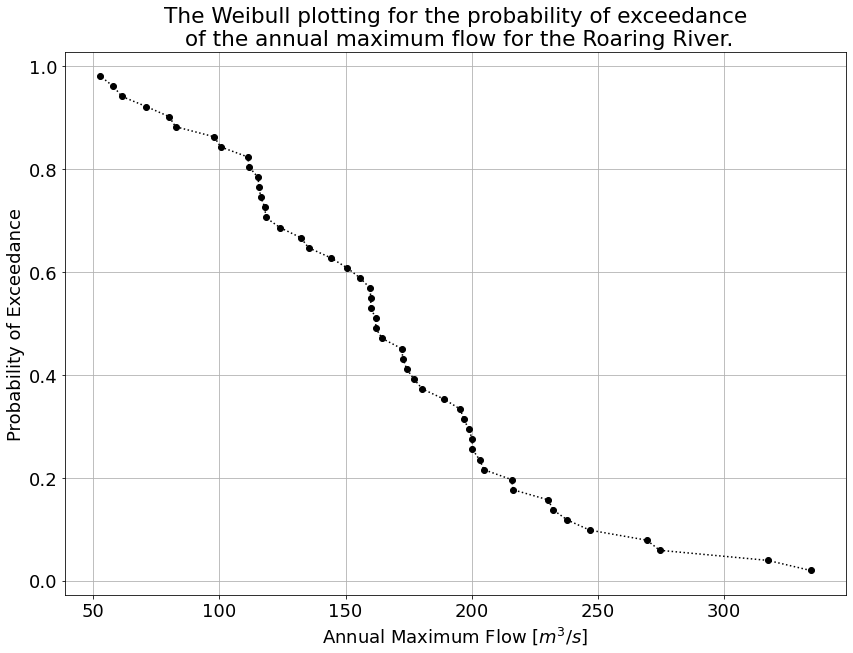

In [167]:
plt.plot(df['Discharge_cms'] ,df['Probability of Exceedance'],'ko:')
plt.grid()
plt.ylabel('Probability of Exceedance')
plt.title("The Weibull plotting for the probability of exceedance\n of the annual maximum flow for the " +str(Name)+ " River.")
plt.xlabel('Annual Maximum Flow, cubic meter per second')
plt.xlabel("Annual Maximum Flow"+r" $[m^3/s]$")


In [170]:
P20 = 1/20
P50 = 1/50

Q20 =np.interp(P20,df['Probability of Exceedance'],df['Discharge_cms'])
Q50 =np.interp(P50,df['Probability of Exceedance'],df['Discharge_cms'])

print('The 20-year flood event has a magnitude of {:.3f} m^3/s'.format(Q20))
print('The 50-year flood event has a magnitude of {:.3f} m^3/s'.format(Q50))

The 20-year flood event has a magnitude of 293.642 m^3/s
The 50-year flood event has a magnitude of 333.811 m^3/s
